
# Лабораторная работа №2  
**Тема:** Исследовательский анализ данных  
**Вариант 1**  
**Набор данных:** salary2.csv



## Цель работы
 изучение связи между признаками двумерного набора данных, 
визуализация данных.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# чтобы графики отображались
%matplotlib inline

# загружаем CSV-файл
df = pd.read_csv('salary2.csv', sep=';')
df.head()


,work_year,employment_type,job_title,salary,salary_in_usd,employee_residence,company_location,company_size,exp_all,exp
0,2020.0,FT,Data SCIENTIST,70000.0,79833.0,DE,DE,L,9,4
1,2020.0,FT,Product Data Analyst,20000.0,20000.0,HN,HN,S,2,2
2,2020.0,FT,Data Analyst,72000.0,72000.0,US,US,L,13,3
3,2020.0,FT,Data Scientist,11000000.0,35735.0,HU,HU,L,60,6
4,2020.0,FT,Data Scientist,45000.0,51321.0,FR,FR,S,8,4



**Пояснение:**  
Импортируются библиотеки, необходимые для анализа и визуализации.  
Файл `salary2.csv` содержит информацию о зарплатах, типе работы, должности, стране, размере компании и опыте.


In [2]:
print("Размер до:", df.shape)
df = df.drop_duplicates()
print("Размер после удаления дубликатов:", df.shape)

print(df.isna().sum())

if 'salary_in_usd' in df.columns:
    df['salary_in_usd'] = df['salary_in_usd'].fillna(df['salary_in_usd'].median())

Размер до: (401, 10)
Размер после удаления дубликатов: (401, 10)
work_year             0
employment_type       0
job_title             0
salary                3
salary_in_usd         0
employee_residence    0
company_location      0
company_size          0
exp_all               0
exp                   0
dtype: int64


In [3]:
print("=== ВСЕ НАЗВАНИЯ СПЕЦИАЛИСТОВ ===")
print("Количество уникальных должностей (до очистки):", df['job_title'].nunique())
print("\nСписок всех должностей до нормализации:")
for i, title in enumerate(sorted(df['job_title'].unique()), 1):
    print(f"{i:2d}. {title}")

# Приведение к нижнему регистру и удаление пробелов
df['job_title'] = df['job_title'].astype(str).str.strip().str.title()

# Словарь для исправления 
normalize_map = {
    'Data Analyticsmanager': 'Data Analytics Manager',
    'Datascientist': 'Data Scientist',
    'Data Scientist': 'Data Scientist',
    'Data Scientist': 'Data Scientist',
    'Data Scientist ': 'Data Scientist',
    'Data Scientist.': 'Data Scientist',
    'Data Science Engineer': 'Data Analytics Engineer',  # если ты хочешь объединить их
}

# Замена дубликатов
df['job_title'] = df['job_title'].replace(normalize_map)

# Повторное обновление регистра
df['job_title'] = df['job_title'].str.title().str.strip()

print("\nКоличество уникальных должностей (после нормализации):", df['job_title'].nunique())
print("\nСписок всех должностей после нормализации:")
for i, title in enumerate(sorted(df['job_title'].unique()), 1):
    print(f"{i:2d}. {title}")

=== ВСЕ НАЗВАНИЯ СПЕЦИАЛИСТОВ ===
Количество уникальных должностей (до очистки): 16

Список всех должностей до нормализации:
 1. Data Analyst
 2. Data Analytics Engineer
 3. Data Analytics Lead
 4. Data Analytics Manager
 5. Data AnalyticsManager
 6. Data Engineer
 7. Data SCIENTIST
 8. Data Science Engineer
 9. Data Scientist
10. DataScientist
11. Head of Data Science
12. Head of Machine Learning
13. Machine Learning Developer
14. Machine Learning Manager
15. NLP Engineer
16. Product Data Analyst

Количество уникальных должностей (после нормализации): 12

Список всех должностей после нормализации:
 1. Data Analyst
 2. Data Analytics Engineer
 3. Data Analytics Lead
 4. Data Analytics Manager
 5. Data Engineer
 6. Data Scientist
 7. Head Of Data Science
 8. Head Of Machine Learning
 9. Machine Learning Developer
10. Machine Learning Manager
11. Nlp Engineer
12. Product Data Analyst



**Пояснение:**  
Предобработка данных, проверка и удаление дубликатов, заполнение пропусков


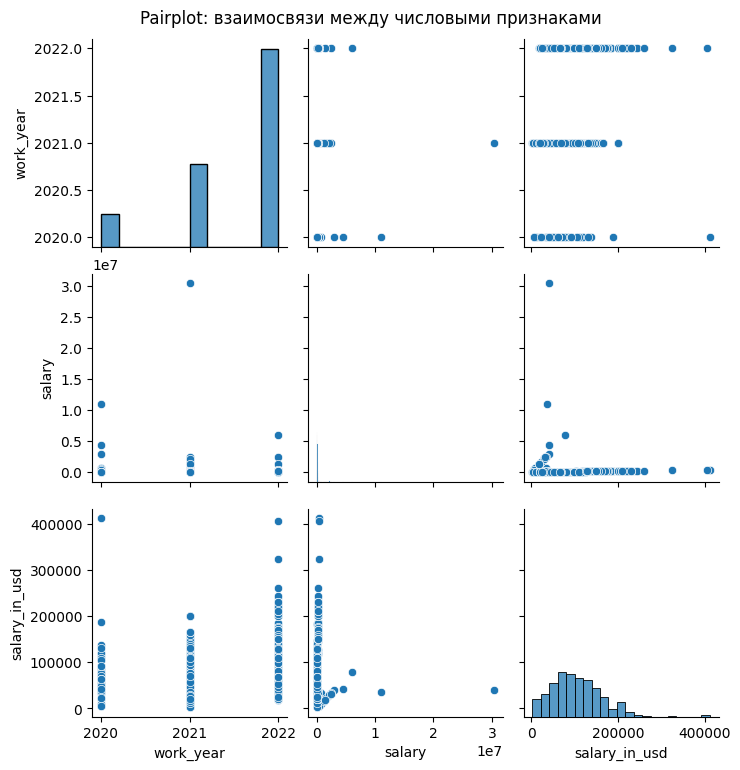

In [15]:
# scatter matrix через seaborn pairplot (только числовые признаки)
num_cols = df.select_dtypes(include=['number']).columns.tolist()
# Если числовых признаков много выбрать до 3
selected = num_cols if len(num_cols) <= 3 else num_cols[:3]
sns.pairplot(df[selected].dropna(), diag_kind='hist', corner=False)
plt.suptitle('Pairplot: взаимосвязи между числовыми признаками', y=1.02)
plt.show()


Диагональ:
work_year имеет три пика — 2020, 2021, 2022, что подтверждает, что данные собраны за три года.
salary и salary_in_usd имеют асимметричное распределение с длинным "хвостом" вправо, то есть большинство работников получают относительно невысокие зарплаты, но встречаются редкие случаи очень высоких значений (выбросы).

Вне диагонали:
Между salary и salary_in_usd — сильная положительная зависимость (чем выше исходная зарплата, тем выше зарплата в USD). Это логично, так как salary_in_usd — нормализованная версия salary.
Между work_year и salary_in_usd или salary — слабая положительная зависимость: в более поздние годы (2021–2022) зарплаты слегка выше. Это говорит о росте средней оплаты труда со временем.

Точки расположены плотнее у нижних значений зарплаты — значит, большинство наблюдений относится к низкому и среднему уровню дохода, а высокие зарплаты — редки.

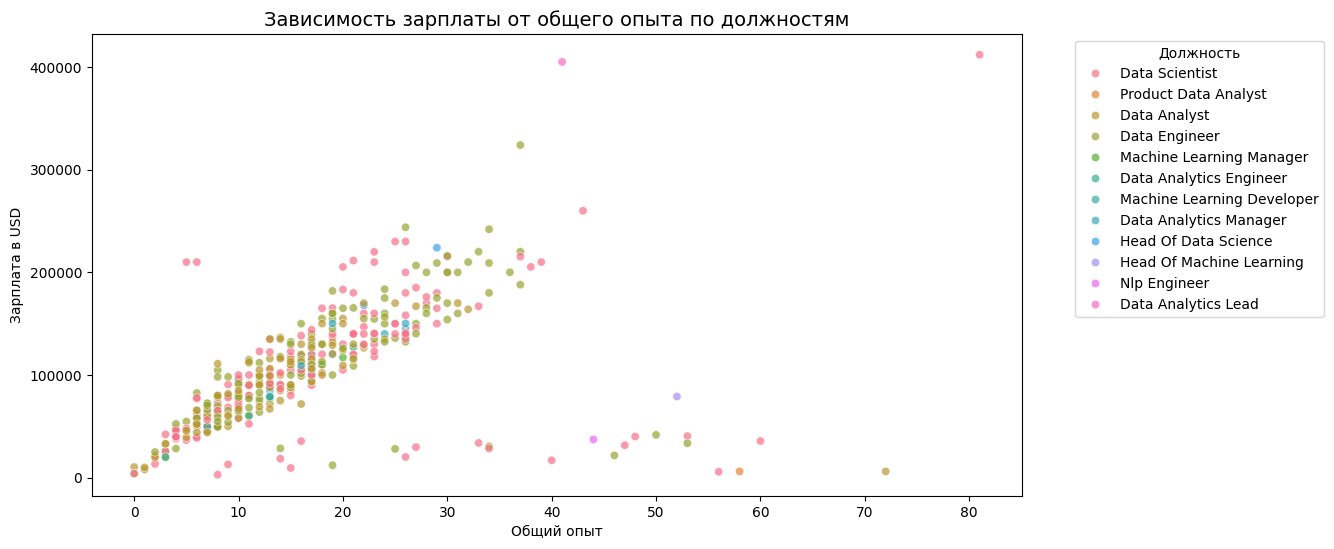

In [5]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='exp_all',
    y='salary_in_usd',
    hue='job_title',
    alpha=0.7
)
plt.title('Зависимость зарплаты от общего опыта по должностям', fontsize=14)
plt.xlabel('Общий опыт')
plt.ylabel('Зарплата в USD')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Должность')
plt.show()



Данная зависимость демонстрирует, что в большинстве случаев при росте опыта работы растет и зарплата. Случаи, когда зп не растет вмесете с опытом редкие

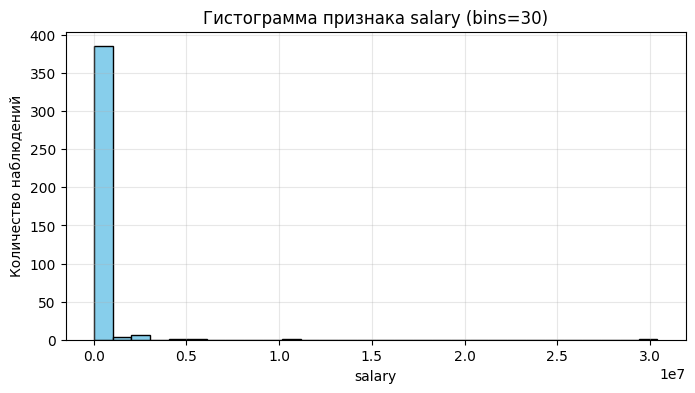

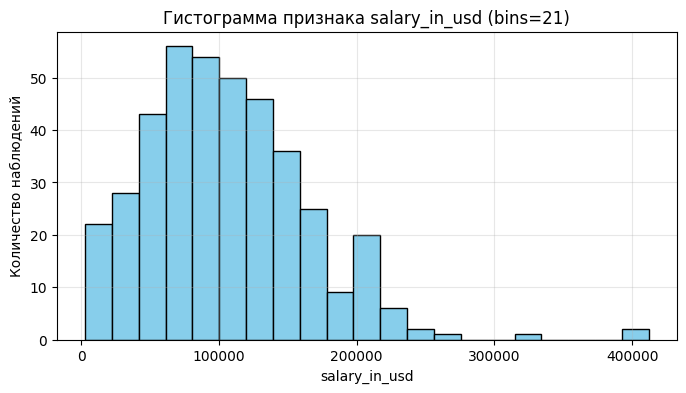

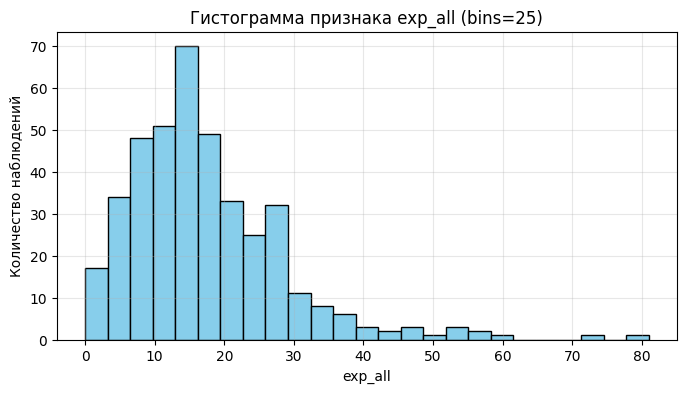

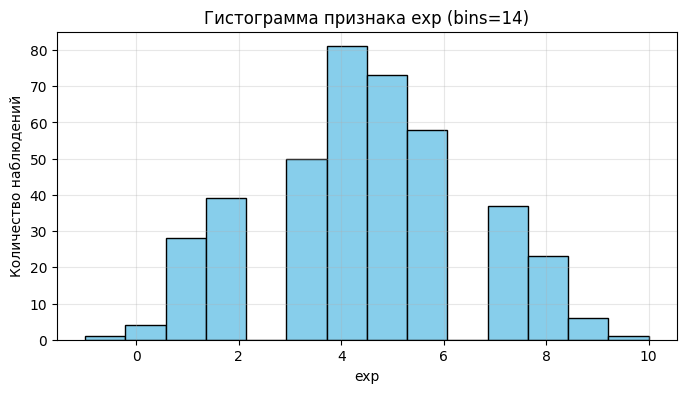

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для расчёта количества bins по правилу Фридмана–Диакониса
def fd_bins(arr):
    arr = arr[~np.isnan(arr)]
    if len(arr) < 2:
        return 10
    q75, q25 = np.percentile(arr, [75, 25])
    iqr = q75 - q25
    h = 2 * iqr / (len(arr) ** (1/3))
    if h <= 0:
        return 10
    bins = int(np.ceil((arr.max() - arr.min()) / h))
    return max(5, min(bins, 30))

# Гистограмма только для числовых столбцов
num_cols = ['salary', 'salary_in_usd', 'exp_all', 'exp']

for col in num_cols:
    arr = df[col].dropna().values
    bins = fd_bins(arr)

    plt.figure(figsize=(8, 4))
    plt.hist(arr, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Гистограмма признака {col} (bins={bins})')
    plt.xlabel(col)
    plt.ylabel('Количество наблюдений')
    plt.grid(alpha=0.3)
    plt.show()


1 гистограмма:
Подавляющее большинство наблюдений сосредоточено в начале шкалы. При этом есть очень длинный "хвост" из крайне высоких зарплат. Такая форма характерна для данных, представленных в разных валютах без приведения к единому знаменателю, что значит, что признак salary требует обязательной нормализации (перевода в USD) для анализа. В текущем виде распределение неинформативно.

2 гистограмма: 
После приведения к единой валюте распределение стало реалистичным. Основная масса данных сосредоточена в диапазоне приблизительно от 50,000 до 200,000. Пик частоты находится в интервале около 80,000-100,000. Наблюдается случаи высоких зарплат, превышающих 300,000. Распределение зарплат в USD соответствует ожиданиям для глобального IT-рынка.

3 гистограмма:
Большинство наблюдений сосредоточено в левой части графика. Пик частоты (около 65-70 наблюдений) приходится на очень небольшой опыт работы, близкий к 1-2 годам работы. Это может быть связано с большим количеством junior-специалистов или студентов в выборке.Это указывает на большое количество начинающих специалистов в выборке. По мере увеличения опыта количество людей с таким опытом постепенно уменьшается. Максимальный опыт в выборке составляет около 70-80 месяцев (5,8-6,7 лет), что является реалистичным значением для работающих специалистов.

4 гистограмма:
Наблюдается очень высокий пик (около 80 наблюдений) для наименьшего значения опыта близкого к 4 месяцам в даннлй компании. Распределение очень быстро спадает - уже после 9 месяцев (менее года) опыта количество специалистов становится невелико. Подавляющее большинство имеют очень небольшой опыт работы именно в своей текущей области (менее года). Это характерно для ситуаций массового перехода людей в IT-сферу или для выборки, состоящей преимущественно из junior-специалистов.

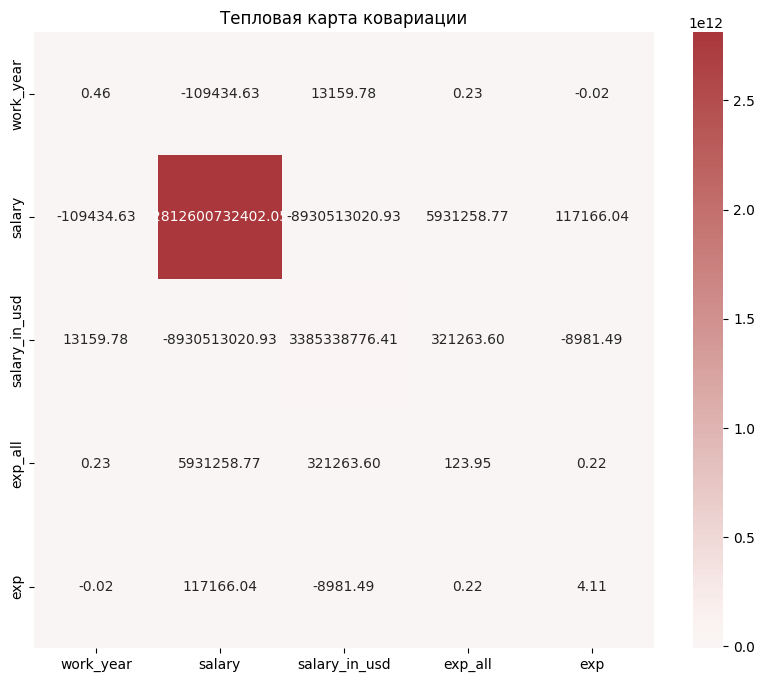

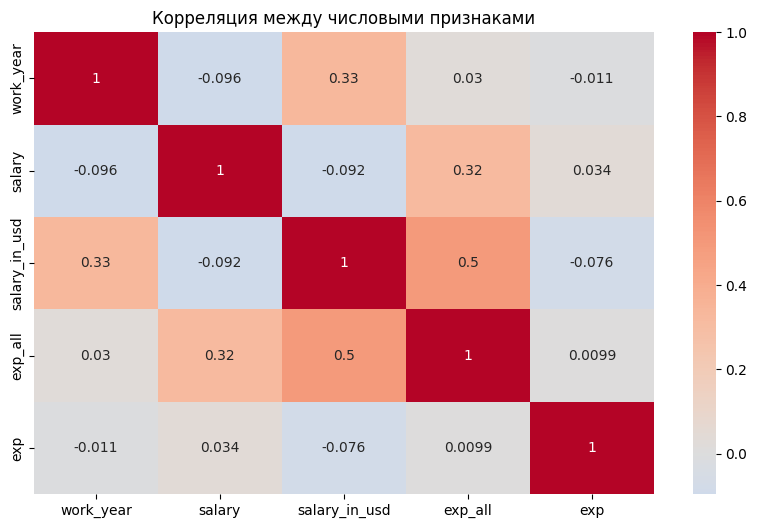

In [8]:
# --- Ковариационная матрица ---
cov = df.select_dtypes(include=['number']).cov()

plt.figure(figsize=(10,8))
sns.heatmap(cov, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title('Тепловая карта ковариации')
plt.show()

# --- Корреляционная матрица ---
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция между числовыми признаками')
plt.show()

Ковариация:
Значения сильно различаются по масштабу из-за разных единиц измерения. Огромные числа для salary_in_usd (812600732402.0) искажают общую картину Трудно сравнивать силу связей между разными парами признаков

Корреляция:
Сильные связи:
exp_all - exp: 0.5 - умеренная положительная корреляция
Общий опыт работы связан с опытом в должности. Это логично и ожидаемо

Слабые связи:
work_year - exp_all: 0.33 - слабая положительная
С течением лет общий опыт работы увеличивается

salary_in_usd - exp: 0.32 - слабая положительная
Зарплата немного зависит от опыта в должности

Практически отсутствующие связи:
work_year - salary_in_usd: -0.096 - почти нет связи
Зарплата практически не зависит от года исследования

salary_in_usd - exp_all: -0.092 - почти нет связи
Зарплата слабо связана с общим опытом работы

work_year - exp: 0.03 - практически нулевая
exp_all - salary_in_usd: 0.034 - практически нулевая


## 🔹 Задание 1. Seaborn — количество компаний каждого размера по годам


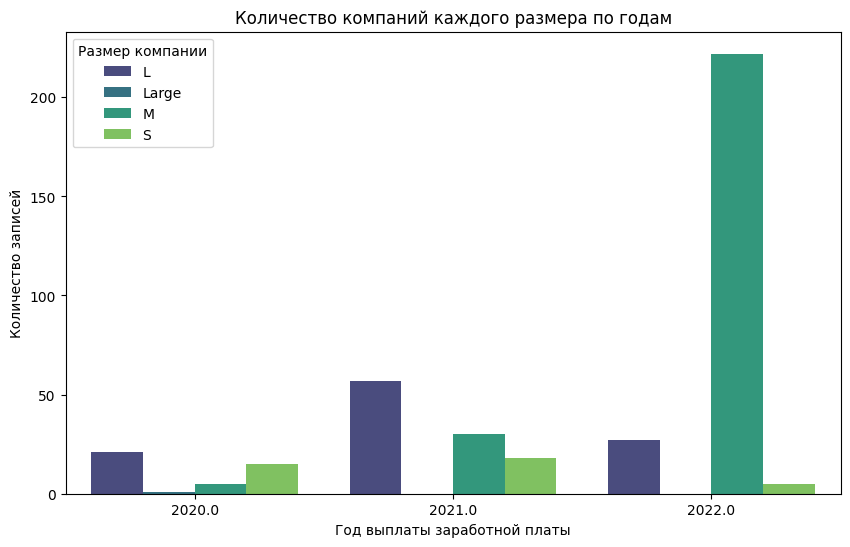

In [9]:

# Группировка по году и размеру компании
grouped = df.groupby(['work_year', 'company_size']).size().reset_index(name='count')

# Построение столбчатой диаграммы
plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='work_year', y='count', hue='company_size', palette='viridis')
plt.title('Количество компаний каждого размера по годам')
plt.xlabel('Год выплаты заработной платы')
plt.ylabel('Количество записей')
plt.legend(title='Размер компании')
plt.show()


По годам:
2020: Наименьшее количество данных, все размеры компаний представлены скромно
2021: Резкий рост по всем категориям, особенно для M и L компаний
2022: Дальнейший рост, M компании доминируют

По размерам компаний:
M: Наиболее стабильный и значительный рост
L: Также показывает рост, но менее выраженный
Large и S: Минимальное присутствие, незначительная динамика


## 🔹 Задание 2. Pandas + Plot — средняя зарплата в USD по должностям


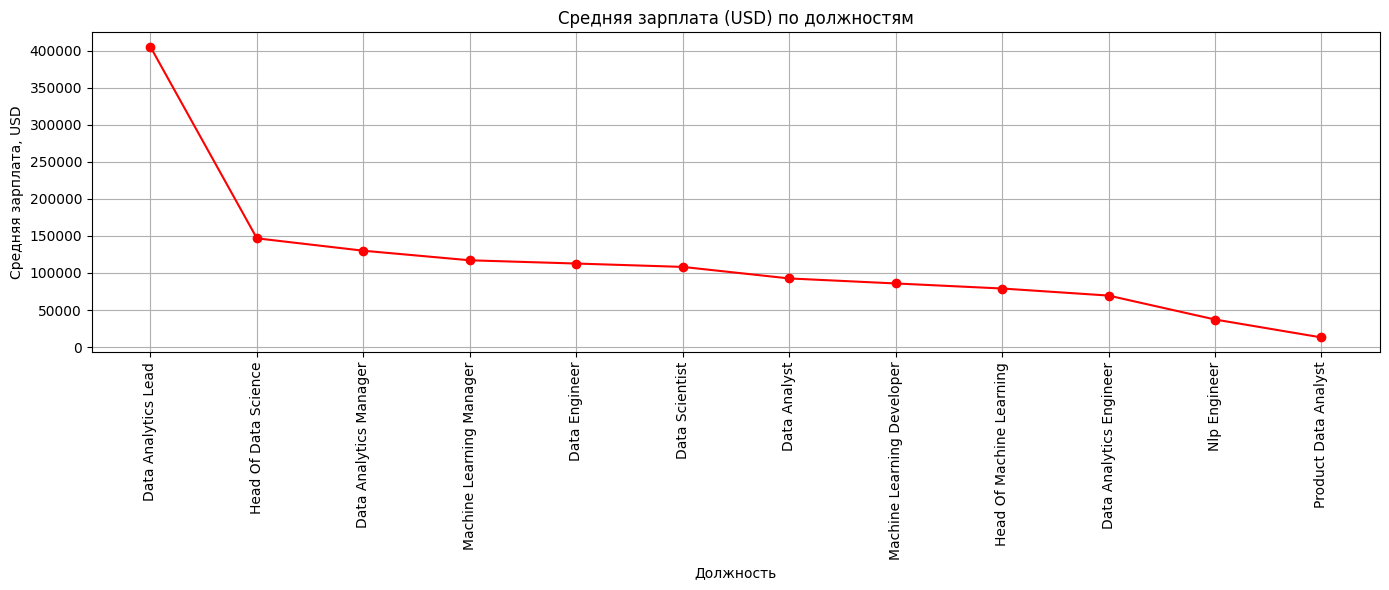

In [16]:
plt.figure(figsize=(14,6))
plt.plot(pivot.index, pivot['salary_in_usd'], color='red', marker='o')
#Заголовки и подписи
plt.title('Средняя зарплата (USD) по должностям')
plt.xlabel('Должность')
plt.ylabel('Средняя зарплата, USD')
plt.grid(True)
plt.xticks(rotation=90, ha='center')  # показываем все подписи
plt.tight_layout()
plt.show()

На графике показано, как средняя зарплата различается между различными должностями. Самые высокие значения наблюдаются у Data Analytics Lead и Head of Data Science — эти позиции связаны с управлением аналитическими командами и высокой ответственностью. Далее идут Data Analytics Manager, Machine Learning Manager и Data Engineer, у которых уровень дохода несколько ниже, но остаётся выше среднего.ьData Scientist, Data Analyst и Machine Learning Developer имеют средний уровень оплаты. Самые низкие значения — у NLP Engineer и Product Data Analyst, что может объясняться меньшей выборкой данных по этим позициям или спецификой рынка. В целом наблюдается чёткая тенденция, чем выше уровень должности и управленческая ответственность — тем выше средняя зарплата


## 🔹 Задание 3. Matplotlib — круговая диаграмма процентов по размерам компаний


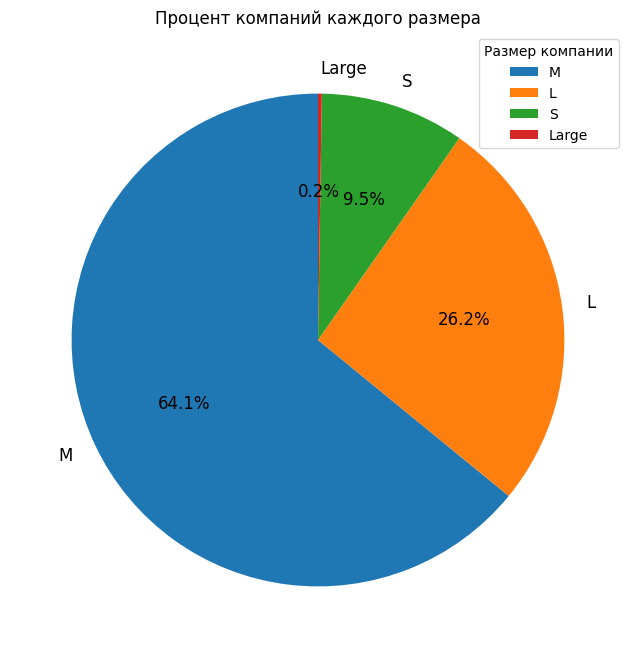

In [11]:

# Подсчёт количества компаний каждого размера
company_counts = df['company_size'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8,8))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Процент компаний каждого размера')
plt.legend(title='Размер компании', loc='upper right')
plt.show()


Рынок данных/IT в этой выборке сильно сконцентрирован вокруг средних и больших компаний. Крупные предприятия практически не представлены (всего 0.2%), а процент малых предприятий даже не доходит до 10

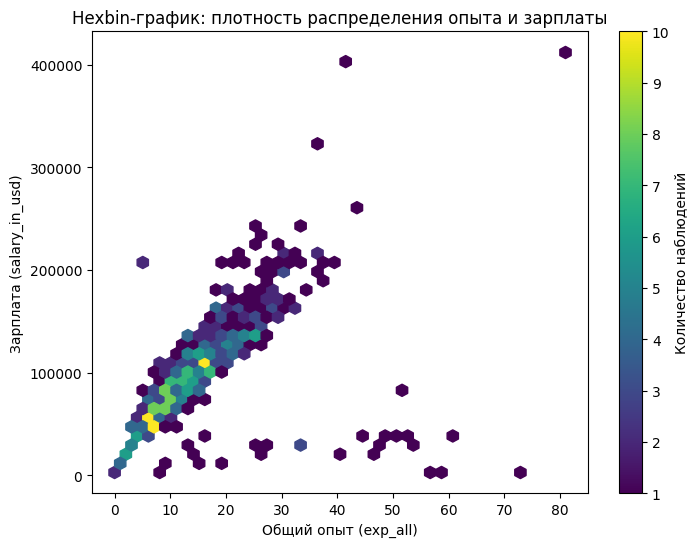

In [12]:
plt.figure(figsize=(8,6))
plt.hexbin(
    x=df['exp_all'].dropna(),
    y=df['salary_in_usd'].dropna(),
    gridsize=40,    # плотность сетки
    mincnt=1,       # игнорировать пустые ячейки
    cmap='viridis'  # цветовая схема
)
plt.colorbar(label='Количество наблюдений')
plt.xlabel('Общий опыт (exp_all)')
plt.ylabel('Зарплата (salary_in_usd)')
plt.title('Hexbin-график: плотность распределения опыта и зарплаты')
plt.show()



Основная часть:
Опыт: Низкие значения (0-30 месяцев)
Зарплата: Средний диапазон (примерно 50,000 - 150,000)
Большинство специалистов в выборке - это junior/middle уровень с относительно невысоким опытом и средней зарплатой

Вертикальное распределение: При одинаковом опыте наблюдается значительный разброс зарплат
Горизонтальное распределение: При одинаковой зарплате - разный опыт работы
На зарплату влияют не только опыт, но и другие факторы (должность, компания, локация)

Выбросы и редкие случаи
Высокий опыт + высокая зарплата: Мало наблюдений в правом верхнем углу
Высокий опыт + низкая зарплата: Практически отсутствуют
Низкий опыт + высокая зарплата: Единичный случай

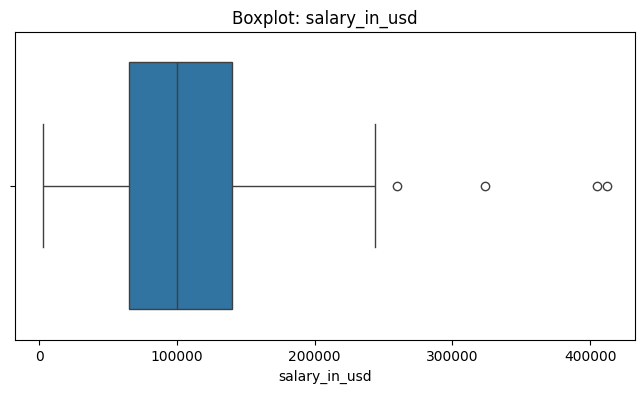

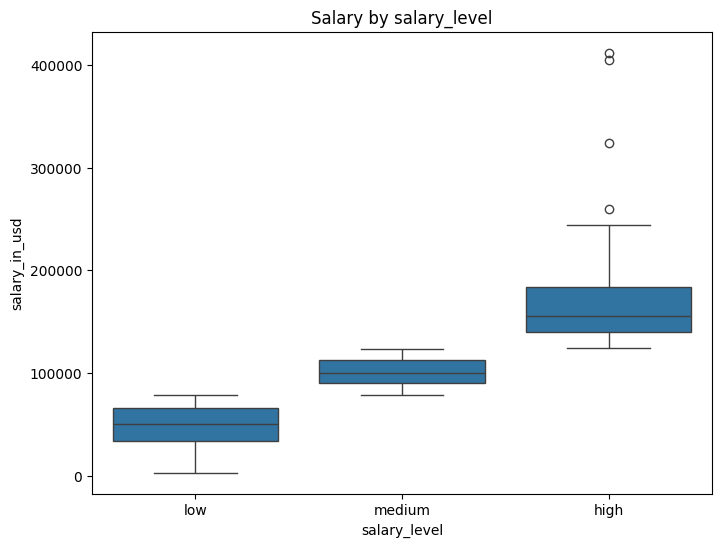

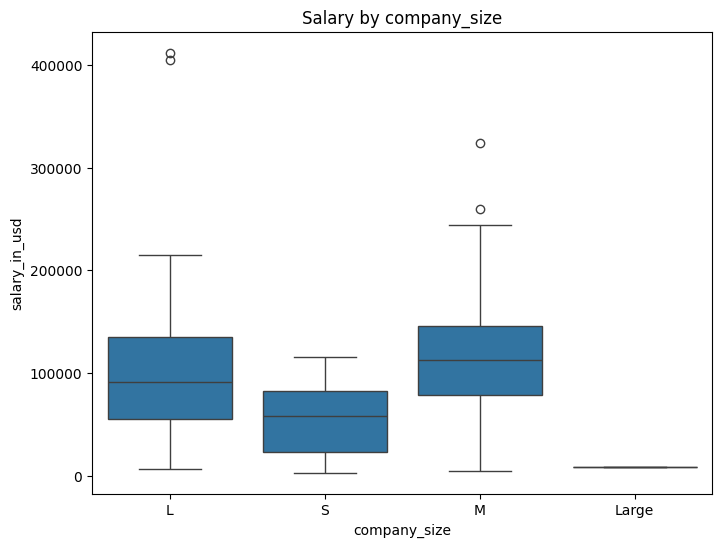

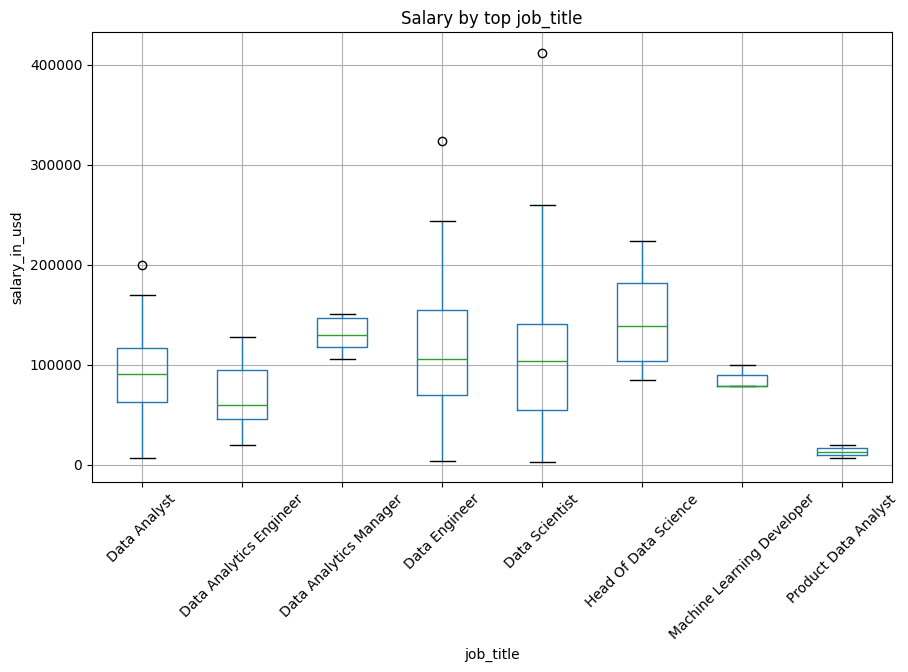

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1) Boxplot для salary_in_usd
plt.figure(figsize=(8,4))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Boxplot: salary_in_usd')
plt.show()

# 2) Создадим категорию уровня зарплаты и boxplot по категориям
bins = [ -1, df['salary_in_usd'].quantile(0.33), df['salary_in_usd'].quantile(0.66), df['salary_in_usd'].max()+1 ]
labels = ['low','medium','high']
df['salary_level'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels)

plt.figure(figsize=(8,6))
sns.boxplot(x='salary_level', y='salary_in_usd', data=df)
plt.title('Salary by salary_level')
plt.show()

# 3a) Boxplot зарплаты по company_size
plt.figure(figsize=(8,6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary by company_size')
plt.show()

# 3b) Boxplot зарплаты по job_title (топ-8 по количеству)
top_jobs = df['job_title'].value_counts().nlargest(8).index
df_top = df[df['job_title'].isin(top_jobs)]
df_top.boxplot(column='salary_in_usd', by='job_title', rot=45, figsize=(10,6))
plt.title('Salary by top job_title')
plt.suptitle('')
plt.ylabel('salary_in_usd')
plt.show()


1 боксплот:
Боксплот визуализирует диапазон зарплат и выбросы. Средняя зарплата — в пределах 60–100 тыс. USD. Множество выбросов сверху, что типично для рынка IT (высокие зарплаты отдельных специалистов). Низкий уровень выбросов снизу почти отсутствует — нижняя граница достаточно плотная.

2 боксплот:
Зарплаты разделены на категории по квантилям. Видно чёткое разделение уровней — медианные значения между группами различаются почти вдвое. Разброс внутри категории увеличивается к высокой группе, что показывает высокую вариативность доходов среди высокооплачиваемых специалистов.

3 боксплот:
Сравнение зарплат в компаниях разного размера. Наибольшие медианные зарплаты у крупных компаний (L). Средние компании (M) занимают промежуточное положение. Малые компании (S) — самые низкие медианные значения. Это соответствует реальной тенденции: чем больше компания, тем выше зарплата.

4 боксплот:
Сравнение зарплат между наиболее частыми должностями. Самые высокие медианные зарплаты у Data Scientist, Machine Learning Engineer, Senior Developer. Наименьшие — у Analyst и Junior Developer. Разброс внутри каждой должности заметный, что отражает различия в уровне опыта и географии.


## Общие выводы
Проведён исследовательский анализ данных о зарплатах специалистов разных профессий, с разным опытом, в компаниях разного размера.

Основные числовые признаки — зарплата и опыт — имеют положительную связь.

Распределения скошены, наблюдаются выбросы в сторону высоких значений.

Размер компании и должность оказывают заметное влияние на зарплату.

Большинство работников — специалисты с небольшим опытом, что отражает характерную пирамиду рынка труда.

Уровень зарплаты в первую очередь зависит от опыта, должности и размера компании.
